# Capstone Project-Augusta Georgia Neighborhood Analysis.

In [129]:
from IPython.display import Image
from IPython.core.display import HTML 
print ('Source: Wikipedia')
Image(url= "http://54.173.9.169/wp-content/uploads/2019/10/Augusta-National-Golf-Club-II.jpg")

Source: Wikipedia


<a href="#item1">Import Libraries</a>

In [130]:
# library to handle data in a vectorized manner
import numpy as np

#Create Array of Desired Size
from numpy import ndarray

# library for data analysis
import pandas as pd 
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

# library to handle JSON files
import json

# uncomment this line if you haven't completed the Foursquare API lab
#!conda install -c conda-forge geopy --yes
# convert an address into latitude and longitude values
from geopy.geocoders import Nominatim 

# library to handle requests
import requests
# tranform JSON file into a pandas dataframe
from pandas.io.json import json_normalize 

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

# for webscraping import Beautiful Soup 
from bs4 import BeautifulSoup

import xml

# map rendering library
#!conda install -c conda-forge folium=0.10.0 --yes
import folium 

print('Libraries imported.')

Libraries imported.


<a href="#item1">Import Neigborhoods surrounding Augusta Golf Course</a>

In [131]:
# The code was removed by Watson Studio for sharing.

,OrderID,Neighbourhood,Latitude,Longitude,Google Maps Link,Map Embed
0,1,National Hills,33.518330,-82.054008,https://goo.gl/maps/2KH3EUYqn2YdDRy47,"<iframe src=""https://www.google.com/maps/embed..."
1,2,Windsor Forest,33.505649,-82.014490,https://goo.gl/maps/7y337UnF9vEM4mcJ7,"<iframe src=""https://www.google.com/maps/embed..."
2,3,West End,33.485707,-82.009732,https://goo.gl/maps/se6bAx9bF4Lk1SXv6,"<iframe src=""https://www.google.com/maps/embed..."
3,4,Harrisburg,33.481098,-82.005393,https://goo.gl/maps/YVWzUNSgL5PHyZWV6,"<iframe src=""https://www.google.com/maps/embed..."
4,5,Midtown,33.470560,-82.007615,https://goo.gl/maps/rwDCzUivygQoxNAu5,"<iframe src=""https://www.google.com/maps/embed..."


<a href="#item1">Import State Neighborhood location Data</a>

In [135]:
#Source - https://hub.arcgis.com/datasets/augustagis::neighborhood/data
r = requests.get('https://opendata.arcgis.com/datasets/2a4061fc408e477b8a5eb1f7a41ac835_48.geojson')
fredericton_geo = r.json()
neighborhoods_data = fredericton_geo['features']
neighborhoods_data[0]

{'type': 'Feature',
 'properties': {'OBJECTID': 1, 'NAME': 'Westside'},
 'geometry': {'type': 'Polygon',
  'coordinates': [[[-82.0707143379286, 33.5161174252933],
    [-82.0430518663843, 33.5120741173932],
    [-82.0390104041381, 33.5162361924691],
    [-82.0389738464133, 33.5162739446306],
    [-82.0384331488411, 33.5167835506375],
    [-82.0364582040992, 33.5186448789231],
    [-82.0354083171773, 33.5193981958697],
    [-82.0353555550568, 33.5194362733961],
    [-82.034012253826, 33.5202772143378],
    [-82.0339748939813, 33.520300535235],
    [-82.0312037447602, 33.5215707131259],
    [-82.0259142632175, 33.5239953944025],
    [-82.0258709578401, 33.5240152707669],
    [-82.0238918005597, 33.5250560067823],
    [-82.0202289420607, 33.5269817636208],
    [-82.0201209672861, 33.5270383207505],
    [-82.0124982464484, 33.5311962593726],
    [-82.015606896148, 33.5324375360436],
    [-82.018326654247, 33.5336129960533],
    [-82.0214350512909, 33.5349843291104],
    [-82.0238427280156, 

<a href="#item1">Import State Census Data</a>

In [136]:
#Source - https://hub.arcgis.com/datasets/augustagis::census-tracts/data
g = requests.get('https://opendata.arcgis.com/datasets/1bd1a6e5e40c4289a554c0e94ad2cb1d_17.geojson')
demog_geo = g.json()
demog_data = demog_geo['features']
demog_data[0]

{'type': 'Feature',
 'properties': {'OBJECTID': 1,
  'STATEFP10': '13',
  'COUNTYFP10': '245',
  'TRACTCE10': '010509',
  'GEOID10': '13245010509',
  'NAME10': '105.09',
  'NAMELSAD10': 'Census Tract 105.09',
  'MTFCC10': 'G5020',
  'FUNCSTAT10': 'S',
  'ALAND10': 4112183,
  'AWATER10': 0,
  'INTPTLAT10': '+33.3975311',
  'INTPTLON10': '-082.0375716',
  'Shape__Area': 5915441.80078125,
  'Shape__Length': 11575.4887525166},
 'geometry': {'type': 'Polygon',
  'coordinates': [[[-82.0471385025759, 33.391242439826],
    [-82.0470395037338, 33.3912234404839],
    [-82.0469555019209, 33.3912064412609],
    [-82.0468025028674, 33.391176440624],
    [-82.0462375029496, 33.3911354403905],
    [-82.0457805038146, 33.3911504404804],
    [-82.0451885024874, 33.3910774399245],
    [-82.0448575028933, 33.3909604400364],
    [-82.0446315013356, 33.3908804400538],
    [-82.0427725002819, 33.3902064401039],
    [-82.042567500983, 33.3901804396754],
    [-82.0422745010536, 33.3901544400617],
    [-82.042

<a href="#item1">Import State Crime Data</a>

In [137]:
#Source https://hub.arcgis.com/datasets/augustagis::crime-1/data?geometry=-83.083%2C33.226%2C-81.106%2C33.627
body = client_7d6f3846565c4a3e84fe2edbbee98539.get_object(Bucket='week5capstonereportneighbourhoodd-donotdelete-pr-gmxeruzpbzjbdm',Key='Augusta_Crime_Data.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

crime_df= pd.read_csv(body)
crime_df.head()

/opt/conda/envs/Python36/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3020: DtypeWarning: Columns (4,5,13) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,X,Y,OBJECTID,CASE_NUMBER,CROSS_STREET,INTERSECTION,STREET_ADDRESS,MONTH,ZIPCODE,MAJOR_CRIME_CATEGORY,CATEGORY,SUBCATEGORY1,SUBCATEGORY2,BEAT,REPORTED_DATE,YEAR
0,-82.066007,33.472074,1,2017-00412862,NaN,NaN,3220 HERITAGE CIR,11-Nov,30909.0,Violent Crimes,Homicide,NaN,NaN,13,2017-11-05T01:25:29.000Z,2017
1,-82.025184,33.422534,2,2017-00414244,NaN,NaN,2714 MARGARET CT,11-Nov,30906.0,Violent Crimes,Robbery,Individual,Armed,24,2017-11-06T11:35:44.000Z,2017
2,-82.080317,33.421334,3,2017-00415999,NaN,NaN,2664 BARTON CHAPEL RD,11-Nov,30906.0,Violent Crimes,Robbery,Individual,Armed,21,2017-11-07T17:46:49.000Z,2017
3,-82.068223,33.390878,4,2017-00420299,NaN,NaN,2509 DRUMCLIFF CT,11-Nov,30815.0,Violent Crimes,Robbery,Individual,Armed,30,2017-11-11T00:24:23.000Z,2017
4,-82.047967,33.399386,5,2017-00416380,NaN,NaN,2350 WINDSOR SPRING RD,11-Nov,30906.0,Violent Crimes,Robbery,Individual,Armed,29,2017-11-08T00:53:19.000Z,2017


In [138]:
#Creating new Dataframe df_evaluate
df_evaluate = crime_df

In [139]:
#Uses Haversine formula to calculate distance of location from Augusta Golf Course
def distanceFromAugustaGolf (lon,lat):
    import math
    lon1 = -82.066007
    lat1 = 33.472074
    R = 6371000; # radius of the earth in meters, https://en.wikipedia.org/wiki/Earth_radius
    dLat = (33.4747346-lat) * math.pi / 180 # Convert degrees to radians
    dLon = (-82.0497226-lon) * math.pi / 180 # Convert degrees to radians
    a = math.sin(dLat/2) * math.sin(dLat/2) + math.cos(lat * math.pi / 180 ) * math.cos(33.4747346 * math.pi / 180 ) * math.sin(dLon/2) * math.sin(dLon/2)
    c = 2 * math.atan2(math.sqrt(a), math.sqrt(1-a))
    d = (R * c)/1000
    return d

In [140]:
# Creates Distance values from Augusta Golf Course
from numpy import ndarray

Distance_Cal_GolfCourse = ndarray((len(df_evaluate),),float)
distance_CalArray = ndarray((len(df_evaluate),),float)
for i in range (len(crime_df)):
    distance_CalArray[i] = distanceFromAugustaGolf (df_evaluate.X[i],df_evaluate.Y[i])
    Distance_Cal_GolfCourse[i] = distance_CalArray[i]

In [141]:
#Adding Distance values from Augusta Golf Course to new column
df_evaluate['Distance From Augusta'] = Distance_Cal_GolfCourse
df_evaluate.head()

,X,Y,OBJECTID,CASE_NUMBER,CROSS_STREET,INTERSECTION,STREET_ADDRESS,MONTH,ZIPCODE,MAJOR_CRIME_CATEGORY,CATEGORY,SUBCATEGORY1,SUBCATEGORY2,BEAT,REPORTED_DATE,YEAR,Distance From Augusta
0,-82.066007,33.472074,1,2017-00412862,NaN,NaN,3220 HERITAGE CIR,11-Nov,30909.0,Violent Crimes,Homicide,NaN,NaN,13,2017-11-05T01:25:29.000Z,2017,1.539092
1,-82.025184,33.422534,2,2017-00414244,NaN,NaN,2714 MARGARET CT,11-Nov,30906.0,Violent Crimes,Robbery,Individual,Armed,24,2017-11-06T11:35:44.000Z,2017,6.234927
2,-82.080317,33.421334,3,2017-00415999,NaN,NaN,2664 BARTON CHAPEL RD,11-Nov,30906.0,Violent Crimes,Robbery,Individual,Armed,21,2017-11-07T17:46:49.000Z,2017,6.581435
3,-82.068223,33.390878,4,2017-00420299,NaN,NaN,2509 DRUMCLIFF CT,11-Nov,30815.0,Violent Crimes,Robbery,Individual,Armed,30,2017-11-11T00:24:23.000Z,2017,9.481174
4,-82.047967,33.399386,5,2017-00416380,NaN,NaN,2350 WINDSOR SPRING RD,11-Nov,30906.0,Violent Crimes,Robbery,Individual,Armed,29,2017-11-08T00:53:19.000Z,2017,8.379977


<a href="#item1">Import State Neigborhood Data</a>

In [142]:

body = client_7d6f3846565c4a3e84fe2edbbee98539.get_object(Bucket='week5capstonereportneighbourhoodd-donotdelete-pr-gmxeruzpbzjbdm',Key='Augusta Neighbourhoods.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

df_Compare_Neigbor = pd.read_csv(body)
df_Compare_Neigbor.head()

,Nearest Neighbourhood,City,State,Coordinates,Latitude,Longitude
0,Academy Baker Ave,Augusta,Georgia,"33.4836288, -82.0845725",33.483629,-82.084572
1,Albion Acres,Augusta,Georgia,"33.4125043, -82.0220507",33.412504,-82.022051
2,Barton Chapel,Augusta,Georgia,"33.4424915, -82.0883992",33.442491,-82.088399
3,Bath-Edie,Augusta,Georgia,"33.3333868, -82.2163489",33.333387,-82.216349
4,Belair,Augusta,Georgia,"33.4600739, -82.1164858",33.460074,-82.116486


<a href="#item1">Finding Nearest Neigborhood</a>

In [143]:
df_Crime_Raw_Data = df_evaluate
df_Neighborhood_Raw_Data = df_Compare_Neigbor

In [144]:
#Uses Haversine formula to calculate distance of location another coordinate (  lon1 = -82.066007, lat1 = 33.472074)
def distanceFromAugustaGolf (crime, neighbourhood):
    import math
    lon = neighbourhood[0]
    lat = neighbourhood[1]
    lon1 = crime[0]
    lat1 = crime[1]
    R = 6371000; # radius of the earth in meters, https://en.wikipedia.org/wiki/Earth_radius
    dLat = (lat1-lat) * math.pi / 180 # Convert degrees to radians
    dLon = (lon1-lon) * math.pi / 180 # Convert degrees to radians
    a = math.sin(dLat/2) * math.sin(dLat/2) + math.cos(lat * math.pi / 180 ) * math.cos(lat1 * math.pi / 180 ) * math.sin(dLon/2) * math.sin(dLon/2)
    c = 2 * math.atan2(math.sqrt(a), math.sqrt(1-a))
    d = (R * c)/1000
    return d

In [14]:
crime_x_and_y = df_Crime_Raw_Data[['X', 'Y']].values.tolist()
neighbourhood_x_and_y = df_Neighborhood_Raw_Data[['Longitude','Latitude']].values.tolist()
names = df_Neighborhood_Raw_Data['Nearest Neighbourhood'].values.tolist()

distance_list = []
neighbourhood_name = []


for x in crime_x_and_y:
    for y in neighbourhood_x_and_y:
        distance_list.append(distanceFromAugustaGolf(x, y))
    
    temp  = min(distance_list)
    neighbourhood_name.append(names[distance_list.index(temp)])
    distance_list = []
        

neighbourhood = pd.Series(neighbourhood_name)
df_Crime_Raw_Data['Nearest Neighbourhood']  = neighbourhood
df_Crime_Raw_Data.head()

,X,Y,OBJECTID,CASE_NUMBER,CROSS_STREET,INTERSECTION,STREET_ADDRESS,MONTH,ZIPCODE,MAJOR_CRIME_CATEGORY,CATEGORY,SUBCATEGORY1,SUBCATEGORY2,BEAT,REPORTED_DATE,YEAR,Distance From Augusta,Nearest Neighbourhood
0,-82.066007,33.472074,1,2017-00412862,NaN,NaN,3220 HERITAGE CIR,11-Nov,30909.0,Violent Crimes,Homicide,NaN,NaN,13,2017-11-05T01:25:29.000Z,2017,1.539092,Forrest Hills
1,-82.025184,33.422534,2,2017-00414244,NaN,NaN,2714 MARGARET CT,11-Nov,30906.0,Violent Crimes,Robbery,Individual,Armed,24,2017-11-06T11:35:44.000Z,2017,6.234927,Albion Acres
2,-82.080317,33.421334,3,2017-00415999,NaN,NaN,2664 BARTON CHAPEL RD,11-Nov,30906.0,Violent Crimes,Robbery,Individual,Armed,21,2017-11-07T17:46:49.000Z,2017,6.581435,Meadowbrook
3,-82.068223,33.390878,4,2017-00420299,NaN,NaN,2509 DRUMCLIFF CT,11-Nov,30815.0,Violent Crimes,Robbery,Individual,Armed,30,2017-11-11T00:24:23.000Z,2017,9.481174,Windsor Spring
4,-82.047967,33.399386,5,2017-00416380,NaN,NaN,2350 WINDSOR SPRING RD,11-Nov,30906.0,Violent Crimes,Robbery,Individual,Armed,29,2017-11-08T00:53:19.000Z,2017,8.379977,Pepperidge


<a href="#item1">Calculate Crime count in each Neighborhood</a>

In [15]:
crime_data = df_Crime_Raw_Data.groupby(['Nearest Neighbourhood']).size().to_frame(name='Count').reset_index()
crime_data.head()

,Nearest Neighbourhood,Count
0,Academy Baker Ave,2181
1,Albion Acres,8062
2,Barton Chapel,4387
3,Bath-Edie,23
4,Belair,1824


<a href="#item1">Adding Crime Count to Neighborhood Dataset</a>

In [16]:
df_Compare_Neigbor.shape

(56, 6)

In [17]:
crime_data.shape

(56, 2)

In [18]:
df_Compare_Neigbor['Crime_Count'] = crime_data['Count']
df_Compare_Neigbor.head()

,Nearest Neighbourhood,City,State,Coordinates,Latitude,Longitude,Crime_Count
0,Academy Baker Ave,Augusta,Georgia,"33.4836288, -82.0845725",33.483629,-82.084572,2181
1,Albion Acres,Augusta,Georgia,"33.4125043, -82.0220507",33.412504,-82.022051,8062
2,Barton Chapel,Augusta,Georgia,"33.4424915, -82.0883992",33.442491,-82.088399,4387
3,Bath-Edie,Augusta,Georgia,"33.3333868, -82.2163489",33.333387,-82.216349,23
4,Belair,Augusta,Georgia,"33.4600739, -82.1164858",33.460074,-82.116486,1824


<a href="#item1">Extract Augusta coordinates in order to view map</a>

In [19]:
address = 'Augusta, Georgia USA'

geolocator = Nominatim()
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('Augusta, Georgia coordinates are {}, {}.'.format(latitude, longitude))

/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:3: DeprecationWarning: Using Nominatim with the default "geopy/1.18.1" `user_agent` is strongly discouraged, as it violates Nominatim's ToS https://operations.osmfoundation.org/policies/nominatim/ and may possibly cause 403 and 429 HTTP errors. Please specify a custom `user_agent` with `Nominatim(user_agent="my-application")` or by overriding the default `user_agent`: `geopy.geocoders.options.default_user_agent = "my-application"`. In geopy 2.0 this will become an exception.
  app.launch_new_instance()


Augusta, Georgia coordinates are 33.4709714, -81.9748429.


<a href="#item1">Map of Augusta, Georgia</a>

In [20]:
#world_geo = r'world_countries.json' # geojson file
world_geo = fredericton_geo # geojson file
Augusta_1_map = folium.Map(location=[33.4709714, -81.9748429], width=1000, height=750,zoom_start=8)
Augusta_1_map

<a href="#item1">Map showing Crime Count in Neigborhoods</a>

In [44]:
# Map showing Revised Crime Count in Neighborhoods.
#import os
from folium.plugins import MarkerCluster

locations = list(zip(df_Compare_Neigbor.Latitude, df_Compare_Neigbor.Longitude))

NearestNeighbourhood = df_Compare_Neigbor['Nearest Neighbourhood']
CrimeCount = df_Compare_Neigbor['Crime_Count']

label_values = list(zip(NearestNeighbourhood, CrimeCount))

popups = ['Neigborhood: {}<br>Crime Count: {}'.format(NearestNeighbourhood, CrimeCount) for (NearestNeighbourhood, CrimeCount) in label_values]

#m = folium.Map(location=[latitude, longitude], zoom_start=11, tiles='Stamen Terrain')  
m = folium.Map(location=[latitude, longitude], zoom_start=11)   
          
marker_cluster = MarkerCluster(
    locations=locations, popups=popups
)

marker_cluster.add_to(m)
#state_geo = os.path.join('US Counties.json')
#state_geo = os.path.join('world_countries.json')
state_geo = fredericton_geo
#state_geo = world_geo

#folium.LayerControl().add_to(m)
#m.save(os.path.join('results', 'Crime Count Neighborhood.html'))
m

<a href="#item1">Examining Crime Types and their frequency</a>

In [24]:
#Examine Crime Counts
crimetype_data = crime_df.groupby(['CATEGORY']).size().to_frame(name='Count').reset_index()
crimetype_data.head()

,CATEGORY,Count
0,Aggravated Assault,1731
1,Arson,330
2,Burglary,18126
3,Carjacking,30
4,Cocaine,1278


In [25]:
#Examine Crime Types
crimepivot = crime_df.pivot_table(index='Nearest Neighbourhood', columns='CATEGORY', aggfunc=pd.Series.count, fill_value=0)
crimepivot.head()

BEAT                                    \
CATEGORY              Aggravated Assault Arson Burglary Carjacking Cocaine   
Nearest Neighbourhood                                                        
Academy Baker Ave                      6     5      250          0       9   
Albion Acres                          97    13     1165          1      43   
Barton Chapel                         61    10      870          1      35   
Bath-Edie                              0     0        5          0       0   
Belair                                11     5      251          0       5   

                                                                              \
CATEGORY              Criminal Damage Forgery Fraud Gambling Heroin Homicide   
Nearest Neighbourhood                                                          
Academy Baker Ave                  27       1    14        0      1        1   
Albion Acres                      122       3    34        0      5        3   
Barton Chapel                      81       2    13        0      1       10   
Bath-Edie                           0       0     0        0      0        0   
Belair                             36       0     0        0      2        1   

                                                                         \
CATEGORY              Kidnapping Marijuana Other Robbery Sexual Offense   
Nearest Neighbourhood                                                     
Academy Baker Ave              3        19   733      32              0   
Albion Acres                   5       104  3985     185             12   
Barton Chapel                  4        57  2149      97              7   
Bath-Edie                      0         0    10       0              0   
Belair                         0        17   938      20              8   

                                                                      \
CATEGORY              Shoplifting Stalking Synthetic Narcotics Theft   
Nearest Neighbourhood                                                  
Academy Baker Ave              74        5                   4   744   
Albion Acres                  149       23                  70  1620   
Barton Chapel                  22       13                  24   713   
Bath-Edie                       0        0                   0     5   
Belair                          8        9                  12   386   

                                                                 \
CATEGORY              Vehicle Theft Weapon Offense White Collar   
Nearest Neighbourhood                                             
Academy Baker Ave                48              1           45   
Albion Acres                    209             23           90   
Barton Chapel                   144              7           16   
Bath-Edie                         0              1            0   
Belair                           37              4           20   

                             CASE_NUMBER                                    \
CATEGORY              Aggravated Assault Arson Burglary Carjacking Cocaine   
Nearest Neighbourhood                                                        
Academy Baker Ave                      8     6      255          0      11   
Albion Acres                          99    13     1165          1      45   
Barton Chapel                         61    10      870          1      35   
Bath-Edie                              0     0        5          0       0   
Belair                                12     5      252          0       5   

                                                                              \
CATEGORY              Criminal Damage Forgery Fraud Gambling Heroin Homicide   
Nearest Neighbourhood                                                          
Academy Baker Ave                  28       1    16        0      1        2   
Albion Acres                      122       3    34        0      5        3   
Barton Chapel                 

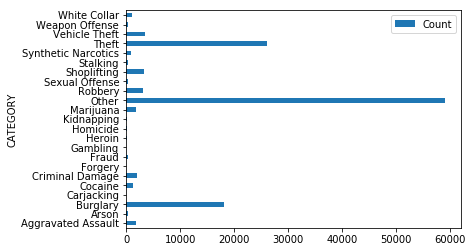

In [108]:
#Examine Crime Frequency
crimetype_data.plot(x='CATEGORY', y='Count', kind='barh')

<a href="#item1">Exclusion Process for determining Crimes most likely to affect Businesses</a>

Text(0.5, 1.0, 'Distance From Augusta bins')

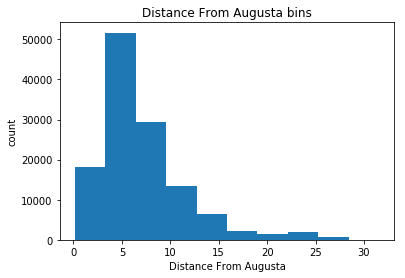

In [101]:
%matplotlib inline
import matplotlib as plt
from matplotlib import pyplot
plt.pyplot.hist(df_evaluate['Distance From Augusta'])

# set x/y labels and plot title
plt.pyplot.xlabel("Distance From Augusta")
plt.pyplot.ylabel("count")
plt.pyplot.title("Distance From Augusta bins")

In [104]:
df_evaluate['MAJOR_CRIME_CATEGORY'].unique()
#df_evaluate['CATEGORY'].unique()
#df_evaluate['MAJOR_CRIME_CATEGORY'].value_counts()
#df_evaluate['CATEGORY'].value_counts()

array(['Violent Crimes', 'Narcotics', 'Property Crimes', 'Other', 'Vice'],
      dtype=object)

In [105]:
#df_evaluate['MAJOR_CRIME_CATEGORY'].unique()
df_evaluate['CATEGORY'].unique()
#df_evaluate['MAJOR_CRIME_CATEGORY'].value_counts()
#df_evaluate['CATEGORY'].value_counts()

array(['Homicide', 'Robbery', 'Weapon Offense', 'Marijuana', 'Theft',
       'Other', 'White Collar', 'Vehicle Theft', nan, 'Burglary',
       'Criminal Damage', 'Sexual Offense', 'Cocaine',
       'Aggravated Assault', 'Stalking', 'Kidnapping',
       'Synthetic Narcotics', 'Arson', 'Carjacking', 'Heroin', 'Gambling',
       'Fraud', 'Forgery', 'Shoplifting'], dtype=object)

In [106]:
#df_evaluate['MAJOR_CRIME_CATEGORY'].unique()
#df_evaluate['CATEGORY'].unique()
df_evaluate['MAJOR_CRIME_CATEGORY'].value_counts()
#df_evaluate['CATEGORY'].value_counts()

Property Crimes    73123
Violent Crimes     46564
Narcotics           4493
Other               1163
Vice                   4
Name: MAJOR_CRIME_CATEGORY, dtype: int64

In [107]:
#df_evaluate['MAJOR_CRIME_CATEGORY'].unique()
#df_evaluate['CATEGORY'].unique()
#df_evaluate['MAJOR_CRIME_CATEGORY'].value_counts()
df_evaluate['CATEGORY'].value_counts()

Other                  59067
Theft                  26016
Burglary               18126
Vehicle Theft           3530
Shoplifting             3314
Robbery                 3077
Criminal Damage         2080
Marijuana               1817
Aggravated Assault      1731
Cocaine                 1278
White Collar            1091
Synthetic Narcotics      853
Fraud                    408
Stalking                 334
Arson                    330
Sexual Offense           315
Weapon Offense           313
Homicide                 158
Kidnapping               156
Heroin                   109
Forgery                   47
Carjacking                30
Gambling                   4
Name: CATEGORY, dtype: int64

In [27]:
#Let's examine theft like crimes:Robbery, Theft,Vehicle Theft, Burglary,Criminal Damage, Carjacking, Fraud, Forgery, Shoplifting
mvcrime_df = crime_df.loc[(crime_df['CATEGORY'] == 'Robbery') | (crime_df['CATEGORY'] == 'Theft') | (crime_df['CATEGORY'] == 'Vehicle Theft') | (crime_df['CATEGORY'] == 'Burglary') | (crime_df['CATEGORY'] == 'Criminal Damage') | (crime_df['CATEGORY'] == 'Carjacking') |(crime_df['CATEGORY'] == 'Fraud') | (crime_df['CATEGORY'] == 'Forgery') | (crime_df['CATEGORY'] == 'Shoplifting')]
mvcrime_df.head()

,X,Y,OBJECTID,CASE_NUMBER,CROSS_STREET,INTERSECTION,STREET_ADDRESS,MONTH,ZIPCODE,MAJOR_CRIME_CATEGORY,CATEGORY,SUBCATEGORY1,SUBCATEGORY2,BEAT,REPORTED_DATE,YEAR,Distance From Augusta,Nearest Neighbourhood
1,-82.025184,33.422534,2,2017-00414244,NaN,NaN,2714 MARGARET CT,11-Nov,30906.0,Violent Crimes,Robbery,Individual,Armed,24,2017-11-06T11:35:44.000Z,2017,6.234927,Albion Acres
2,-82.080317,33.421334,3,2017-00415999,NaN,NaN,2664 BARTON CHAPEL RD,11-Nov,30906.0,Violent Crimes,Robbery,Individual,Armed,21,2017-11-07T17:46:49.000Z,2017,6.581435,Meadowbrook
3,-82.068223,33.390878,4,2017-00420299,NaN,NaN,2509 DRUMCLIFF CT,11-Nov,30815.0,Violent Crimes,Robbery,Individual,Armed,30,2017-11-11T00:24:23.000Z,2017,9.481174,Windsor Spring
4,-82.047967,33.399386,5,2017-00416380,NaN,NaN,2350 WINDSOR SPRING RD,11-Nov,30906.0,Violent Crimes,Robbery,Individual,Armed,29,2017-11-08T00:53:19.000Z,2017,8.379977,Pepperidge
5,-82.077984,33.407351,6,2017-00423141,NaN,NaN,2900 DAHLIA DR,11-Nov,30906.0,Violent Crimes,Robbery,Individual,Armed,30,2017-11-13T20:07:08.000Z,2017,7.938293,Meadowbrook


In [28]:
mvcrime_data = mvcrime_df.groupby(['Nearest Neighbourhood']).size().to_frame(name='Count').reset_index()
mvcrime_data.head()

,Nearest Neighbourhood,Count
0,Academy Baker Ave,1232
1,Albion Acres,3495
2,Barton Chapel,1943
3,Bath-Edie,10
4,Belair,751


<a href="#item1">Exclusion Process - Decreasing Crime Data</a>

In [29]:
df_Compare_Neigbor['New_Crime_Count'] = mvcrime_data['Count']
df_Compare_Neigbor.head()

,Nearest Neighbourhood,City,State,Coordinates,Latitude,Longitude,Crime_Count,New_Crime_Count
0,Academy Baker Ave,Augusta,Georgia,"33.4836288, -82.0845725",33.483629,-82.084572,2181,1232
1,Albion Acres,Augusta,Georgia,"33.4125043, -82.0220507",33.412504,-82.022051,8062,3495
2,Barton Chapel,Augusta,Georgia,"33.4424915, -82.0883992",33.442491,-82.088399,4387,1943
3,Bath-Edie,Augusta,Georgia,"33.3333868, -82.2163489",33.333387,-82.216349,23,10
4,Belair,Augusta,Georgia,"33.4600739, -82.1164858",33.460074,-82.116486,1824,751


In [103]:
#Months with the lowest crime
mvcrime_df['MONTH'].value_counts()

10-Oct    5188
1-Jan     5044
12-Dec    4931
5-May     4856
9-Sep     4842
4-Apr     4732
11-Nov    4681
6-Jun     4657
7-Jul     4644
8-Aug     4566
3-Mar     4244
2-Feb     3908
Name: MONTH, dtype: int64

In [30]:
# Map showing Revised Crime Count in Neighborhoods.
import os
from folium.plugins import MarkerCluster

locations = list(zip(df_Compare_Neigbor.Latitude, df_Compare_Neigbor.Longitude))

NearestNeighbourhood = df_Compare_Neigbor['Nearest Neighbourhood']
CrimeCount = df_Compare_Neigbor['New_Crime_Count']

label_values = list(zip(NearestNeighbourhood, CrimeCount))

popups = ['Neigborhood: {}<br>Crime Count: {}'.format(NearestNeighbourhood, CrimeCount) for (NearestNeighbourhood, CrimeCount) in label_values]

#m = folium.Map(location=[latitude, longitude], zoom_start=11, tiles='Mapbox Bright') 
m = folium.Map(location=[latitude, longitude], zoom_start=11) 
          
marker_cluster = MarkerCluster(
    locations=locations, popups=popups
)

marker_cluster.add_to(m)
#state_geo = os.path.join('world_countries.json')
state_geo = os.path.join('US Counties.json')


folium.LayerControl().add_to(m)
#m.save(os.path.join('results', 'Crime Count Neighborhood.html'))
m

<a href="#item1">Explore augusta Neighbourhoods with Foursquare</a>

In [112]:
# The code was removed by Watson Studio for sharing.

Your credentails:
CLIENT_ID: R0WVR5UUEXTWU3X3Z41L4J5L4OLVLDEAHAAQ2ISR54ZQODX5
CLIENT_SECRET:LIZQKM5MPKFYMU5SAVA3KICQYM3M1ZPNCYT34QM0OCM20V0D


In [113]:


#Let's take a look at nearby venues

def getNearbyVenues(names, latitudes, longitudes, radius=1000, LIMIT=100):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng,            
            v['venue']['name'], 
            v['venue']['id'],
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Location', 
                  'Location Latitude', 
                  'Location Longitude', 
                  'Venue',
                  'Venue id',                
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category'        
                   ]
    
    return(nearby_venues)


In [114]:
augusta_data_venues = getNearbyVenues(names=location_df['Neighbourhood'],
                                   latitudes=location_df['Latitude'],
                                   longitudes=location_df['Longitude']
                                  )

National Hills
Windsor Forest
West End
Harrisburg
Midtown
Summerville
Westwick
Sand Hills
Woodbluff
Montclair
Brookfield West


In [83]:
print(augusta_data_venues.shape)
augusta_data_venues

(247, 8)


,Location,Location Latitude,Location Longitude,Venue,Venue id,Venue Latitude,Venue Longitude,Venue Category
0,National Hills,33.518330,-82.054008,Taqueria El Patron,511ffab1e4b0bc188f9fba74,33.514056,-82.054317,Mexican Restaurant
1,National Hills,33.518330,-82.054008,Chick-fil-A,4ba3e6a9f964a520b36b38e3,33.512945,-82.051843,Fast Food Restaurant
2,National Hills,33.518330,-82.054008,Rhinehart's Oyster Bar,4bc25dbc2a89ef3b7fbcf388,33.513246,-82.050564,Seafood Restaurant
3,National Hills,33.518330,-82.054008,Captain D's,4c16a7a7cd4bc9b6a7bf4eeb,33.513252,-82.048211,Seafood Restaurant
4,National Hills,33.518330,-82.054008,Brookfield Park,4e5d90b1ae60839ea2e700ec,33.522685,-82.055508,Park
5,National Hills,33.518330,-82.054008,Fleet Feet of Augusta,5037ad3fe4b0024b236aa25c,33.517796,-82.059257,Sporting Goods Shop
6,National Hills,33.518330,-82.054008,Shannon's,4d9d12b75c33a35d2be8f9a0,33.515784,-82.054573,Bar
7,National Hills,33.518330,-82.054008,Dairy Queen,4bd3a23377b29c7414639182,33.515184,-82.059013,Fast Food Restaurant
8,National Hills,33.518330,-82.054008,Marco's Pizza,4dc58428d22dafda2fa6becc,33.517698,-82.059438,Pizza Place
9,National Hills,33.518330,-82.054008,Bowlero,5ccfa56ef5e9d7002cb415c0,33.515995,-82.052310,Bowling Alley


In [115]:
#There are 113 unique venue categories.
print('There are {} unique venue categories.'.format(len(augusta_data_venues['Venue Category'].unique())))

There are 113 unique venue categories.


In [116]:
#There are 209 unique venues.
print('There are {} unique venues.'.format(len(augusta_data_venues['Venue id'].unique())))

There are 209 unique venues.


In [117]:
univen = augusta_data_venues.groupby('Location').nunique('Venue Category')
univen

,Location,Location Latitude,Location Longitude,Venue,Venue id,Venue Latitude,Venue Longitude,Venue Category
Location,,,,,,,,
Brookfield West,1,1,1,25,25,25,25,25
Harrisburg,1,1,1,19,19,19,19,15
Midtown,1,1,1,17,17,17,17,16
Montclair,1,1,1,7,7,7,7,7
National Hills,1,1,1,33,33,33,33,21
Sand Hills,1,1,1,19,19,19,18,16
Summerville,1,1,1,23,23,23,22,21
West End,1,1,1,9,9,9,9,9
Westwick,1,1,1,70,71,71,71,53


In [87]:
augusta_data_venues.groupby('Venue Category').nunique()

,Location,Location Latitude,Location Longitude,Venue,Venue id,Venue Latitude,Venue Longitude,Venue Category
Venue Category,,,,,,,,
American Restaurant,5,5,5,6,6,6,6,1
Arts & Crafts Store,1,1,1,1,1,1,1,1
Athletics & Sports,1,1,1,1,1,1,1,1
Automotive Shop,1,1,1,1,1,1,1,1
BBQ Joint,2,2,2,2,2,2,2,1
Bakery,1,1,1,1,1,1,1,1
Bar,2,2,2,3,3,3,3,1
Big Box Store,1,1,1,1,1,1,1,1
Boutique,2,2,2,2,2,2,2,1


<a href="#item1">Analyze each Location </a>

In [118]:
# one hot encoding
freddy_onehot = pd.get_dummies(augusta_data_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighbourhood column back to dataframe
freddy_onehot['Location'] = augusta_data_venues['Location'] 

# move neighbourhood column to the first column
fixed_columns = [freddy_onehot.columns[-1]] + list(freddy_onehot.columns[:-1])
freddy_onehot = freddy_onehot[fixed_columns]

freddy_onehot.head()

,Location,American Restaurant,Arts & Crafts Store,Athletics & Sports,Automotive Shop,BBQ Joint,Bakery,Bar,Big Box Store,Boutique,Bowling Alley,Breakfast Spot,Bridal Shop,Burger Joint,Burrito Place,Business Service,Cajun / Creole Restaurant,Chinese Restaurant,Clothing Store,Coffee Shop,Construction & Landscaping,Convenience Store,Cosmetics Shop,Credit Union,Dance Studio,Department Store,Diner,Disc Golf,Discount Store,Dive Bar,Donut Shop,Event Space,Fabric Shop,Farmers Market,Fast Food Restaurant,Food,Fried Chicken Joint,Frozen Yogurt Shop,Furniture / Home Store,Gas Station,Gift Shop,Golf Course,Grocery Store,Gym,Gym / Fitness Center,Health & Beauty Service,Historic Site,Home Service,Hotel,Hotel Bar,Ice Cream Shop,Intersection,Italian Restaurant,Japanese Restaurant,Jewelry Store,Juice Bar,Kids Store,Korean Restaurant,Lake,Lingerie Store,Liquor Store,Locksmith,Lounge,Market,Medical Supply Store,Mediterranean Restaurant,Men's Store,Mexican Restaurant,Middle Eastern Restaurant,Miscellaneous Shop,Mobile Phone Shop,Mongolian Restaurant,Movie Theater,Music Store,Music Venue,New American Restaurant,Nightclub,Other Repair Shop,Outdoors & Recreation,Paper / Office Supplies Store,Park,Pet Store,Pharmacy,Pizza Place,Pool,Pool Hall,Print Shop,Radio Station,Rental Car Location,Roller Rink,Rugby Pitch,Salon / Barbershop,Sandwich Place,Seafood Restaurant,Shipping Store,Shoe Store,Shopping Plaza,Smoothie Shop,Snack Place,Southern / Soul Food Restaurant,Spa,Sporting Goods Shop,Sports Bar,Steakhouse,Supplement Shop,Sushi Restaurant,Tanning Salon,Tapas Restaurant,Tex-Mex Restaurant,Thrift / Vintage Store,Video Game Store,Video Store,Wings Joint,Women's Store
0,National Hills,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,National Hills,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,National Hills,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,National Hills,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,National Hills,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [119]:
freddy_onehot.shape

(247, 114)

In [120]:
#Group rows by location and by the mean of the frequency of occurrence of each category
freddy_grouped = freddy_onehot.groupby('Location').mean().reset_index()
freddy_grouped

,Location,American Restaurant,Arts & Crafts Store,Athletics & Sports,Automotive Shop,BBQ Joint,Bakery,Bar,Big Box Store,Boutique,Bowling Alley,Breakfast Spot,Bridal Shop,Burger Joint,Burrito Place,Business Service,Cajun / Creole Restaurant,Chinese Restaurant,Clothing Store,Coffee Shop,Construction & Landscaping,Convenience Store,Cosmetics Shop,Credit Union,Dance Studio,Department Store,Diner,Disc Golf,Discount Store,Dive Bar,Donut Shop,Event Space,Fabric Shop,Farmers Market,Fast Food Restaurant,Food,Fried Chicken Joint,Frozen Yogurt Shop,Furniture / Home Store,Gas Station,Gift Shop,Golf Course,Grocery Store,Gym,Gym / Fitness Center,Health & Beauty Service,Historic Site,Home Service,Hotel,Hotel Bar,Ice Cream Shop,Intersection,Italian Restaurant,Japanese Restaurant,Jewelry Store,Juice Bar,Kids Store,Korean Restaurant,Lake,Lingerie Store,Liquor Store,Locksmith,Lounge,Market,Medical Supply Store,Mediterranean Restaurant,Men's Store,Mexican Restaurant,Middle Eastern Restaurant,Miscellaneous Shop,Mobile Phone Shop,Mongolian Restaurant,Movie Theater,Music Store,Music Venue,New American Restaurant,Nightclub,Other Repair Shop,Outdoors & Recreation,Paper / Office Supplies Store,Park,Pet Store,Pharmacy,Pizza Place,Pool,Pool Hall,Print Shop,Radio Station,Rental Car Location,Roller Rink,Rugby Pitch,Salon / Barbershop,Sandwich Place,Seafood Restaurant,Shipping Store,Shoe Store,Shopping Plaza,Smoothie Shop,Snack Place,Southern / Soul Food Restaurant,Spa,Sporting Goods Shop,Sports Bar,Steakhouse,Supplement Shop,Sushi Restaurant,Tanning Salon,Tapas Restaurant,Tex-Mex Restaurant,Thrift / Vintage Store,Video Game Store,Video Store,Wings Joint,Women's Store
0,Brookfield West,0.040000,0.000000,0.04,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.040000,0.000000,0.000000,0.040000,0.000000,0.000000,0.040000,0.000000,0.000000,0.000000,0.000000,0.000000,0.040000,0.000000,0.000000,0.000000,0.000000,0.000000,0.040000,0.000000,0.000000,0.000000,0.040000,0.040000,0.000000,0.000000,0.040000,0.000000,0.040000,0.000000,0.000000,0.04,0.000000,0.000000,0.000000,0.000000,0.000000,0.040000,0.000000,0.000000,0.000000,0.04,0.000000,0.040000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.04,0.000000,0.040000,0.000000,0.040000,0.040000,0.0,0.000000,0.000000,0.000000,0.040000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.040000,0.040000,0.000000,0.040000,0.000000,0.000000,0.04,0.000000,0.000000,0.040000,0.000000,0.000000,0.000000,0.000000
1,Harrisburg,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.052632,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.052632,0.105263,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.052632,0.000000,0.105263,0.000000,0.000000,0.000000,0.000000,0.052632,0.000000,0.052632,0.000000,0.000000,0.000000,0.00,0.052632,0.052632,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.052632,0.000000,0.000000,0.052632,0.000000,0.000000,0.000000,0.105263,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.00,0.000000,0.105263,0.000000,0.000000,0.052632,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.052632,0.000000,0.000000,0.000000,0.000000
2,Midtown,0.000000,0.000000,0.00,0.000000,0.058824,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.058824,0.000000,0.058824,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.058824,0.058824,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.058824

In [121]:
freddy_grouped.shape

(11, 114)

<a href="#item1">Print each Location with the top 5 most common venues </a>

In [122]:
num_top_venues = 5

for hood in freddy_grouped['Location']:
    print("----"+hood+"----")
    temp = freddy_grouped[freddy_grouped['Location'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Brookfield West----
                    venue  freq
0     American Restaurant  0.04
1   Outdoors & Recreation  0.04
2    Fast Food Restaurant  0.04
3  Furniture / Home Store  0.04
4             Gas Station  0.04


----Harrisburg----
                  venue  freq
0                  Park  0.11
1     Convenience Store  0.11
2   Fried Chicken Joint  0.11
3    Mexican Restaurant  0.11
4  Fast Food Restaurant  0.05


----Midtown----
                venue  freq
0  Mexican Restaurant  0.12
1              Market  0.06
2           Hotel Bar  0.06
3         Pizza Place  0.06
4            Dive Bar  0.06


----Montclair----
                 venue  freq
0            Pool Hall  0.14
1       Farmers Market  0.14
2            BBQ Joint  0.14
3  Rental Car Location  0.14
4  Fried Chicken Joint  0.14


----National Hills----
                  venue  freq
0                 Hotel  0.15
1  Fast Food Restaurant  0.12
2           Pizza Place  0.09
3    Mexican Restaurant  0.06
4                   Bar  0.0

In [123]:
#Now into a pandas dataframe
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Location']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
location_venues_sorted = pd.DataFrame(columns=columns)
location_venues_sorted['Location'] = freddy_grouped['Location']

for ind in np.arange(freddy_grouped.shape[0]):
    location_venues_sorted.iloc[ind, 1:] = return_most_common_venues(freddy_grouped.iloc[ind, :], num_top_venues)

location_venues_sorted

,Location,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Brookfield West,Korean Restaurant,Grocery Store,Pharmacy,Park,Outdoors & Recreation,Lingerie Store,Japanese Restaurant,Home Service,Gym / Fitness Center,Gas Station
1,Harrisburg,Park,Mexican Restaurant,Fried Chicken Joint,Convenience Store,Thrift / Vintage Store,Hotel Bar,Hotel,Liquor Store,Construction & Landscaping,Fast Food Restaurant
2,Midtown,Mexican Restaurant,Pizza Place,Market,Dive Bar,Discount Store,Fried Chicken Joint,Convenience Store,Sandwich Place,Coffee Shop,Snack Place
3,Montclair,Pool Hall,BBQ Joint,Rental Car Location,Sushi Restaurant,Farmers Market,Nightclub,Fried Chicken Joint,Women's Store,Gas Station,Donut Shop
4,National Hills,Hotel,Fast Food Restaurant,Pizza Place,Mexican Restaurant,Seafood Restaurant,Bar,American Restaurant,Breakfast Spot,Roller Rink,Coffee Shop
5,Sand Hills,American Restaurant,Men's Store,Boutique,Shoe Store,Wings Joint,Historic Site,Mediterranean Restaurant,Gift Shop,Gas Station,Nightclub
6,Summerville,American Restaurant,Men's Store,Historic Site,Mediterranean Restaurant,Lounge,Liquor Store,Wings Joint,Italian Restaurant,Gym / Fitness Center,Shoe Store
7,West End,Golf Course,Sporting Goods Shop,Disc Golf,Convenience Store,Rugby Pitch,Food,Park,Thrift / Vintage Store,Lake,Hotel Bar
8,Westwick,Furniture / Home Store,Cosmetics Shop,Coffee Shop,Pizza Place,Sandwich Place,American Restaurant,Shoe Store,Gift Shop,Frozen Yogurt Shop,Hotel
9,Windsor Forest,Music Store,Event Space,Locksmith,Golf Course,Grocery Store,Southern / Soul Food Restaurant,Bridal Shop,Seafood Restaurant,Mobile Phone Shop,Health & Beauty Service


In [124]:
#Cluster augusta Locations
#Run k-means to cluster Locations into 5 clusters
# set number of clusters
kclusters = 5

freddy_grouped_clustering = freddy_grouped.drop('Location', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(freddy_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 

array([2, 2, 2, 3, 2, 0, 0, 4, 2, 2], dtype=int32)

In [125]:
freddy_merged = location_df

freddy_merged['Cluster Labels'] = kmeans.labels_
freddy_merged

,Neighbourhood,Latitude,Longitude,Cluster Labels
0,National Hills,33.518330,-82.054008,2
1,Windsor Forest,33.505649,-82.014490,2
2,West End,33.485707,-82.009732,2
3,Harrisburg,33.481098,-82.005393,3
4,Midtown,33.470560,-82.007615,2
5,Summerville,33.480784,-82.035698,0
6,Westwick,33.485891,-82.087328,0
7,Sand Hills,33.484286,-82.035957,4
8,Woodbluff,33.498324,-82.049889,2
9,Montclair,33.508583,-82.073332,2


In [126]:
freddy_merged = freddy_merged.join(location_venues_sorted.set_index('Location'), on='Neighbourhood')

<a href="#item1">New dataframe including the cluster as well as the top 10 venues for each Location</a>

In [127]:
#Now creating a new dataframe including the cluster as well as the top 10 venues for each Location
freddy_merged = location_df

# add clustering labels
freddy_merged['Cluster Labels'] = kmeans.labels_

# merge augusta_grouped with location df to add latitude/longitude for each location
freddy_merged = freddy_merged.join(location_venues_sorted.set_index('Location'), on='Neighbourhood')

freddy_merged# check the last columns!


,Neighbourhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,National Hills,33.518330,-82.054008,2,Hotel,Fast Food Restaurant,Pizza Place,Mexican Restaurant,Seafood Restaurant,Bar,American Restaurant,Breakfast Spot,Roller Rink,Coffee Shop
1,Windsor Forest,33.505649,-82.014490,2,Music Store,Event Space,Locksmith,Golf Course,Grocery Store,Southern / Soul Food Restaurant,Bridal Shop,Seafood Restaurant,Mobile Phone Shop,Health & Beauty Service
2,West End,33.485707,-82.009732,2,Golf Course,Sporting Goods Shop,Disc Golf,Convenience Store,Rugby Pitch,Food,Park,Thrift / Vintage Store,Lake,Hotel Bar
3,Harrisburg,33.481098,-82.005393,3,Park,Mexican Restaurant,Fried Chicken Joint,Convenience Store,Thrift / Vintage Store,Hotel Bar,Hotel,Liquor Store,Construction & Landscaping,Fast Food Restaurant
4,Midtown,33.470560,-82.007615,2,Mexican Restaurant,Pizza Place,Market,Dive Bar,Discount Store,Fried Chicken Joint,Convenience Store,Sandwich Place,Coffee Shop,Snack Place
5,Summerville,33.480784,-82.035698,0,American Restaurant,Men's Store,Historic Site,Mediterranean Restaurant,Lounge,Liquor Store,Wings Joint,Italian Restaurant,Gym / Fitness Center,Shoe Store
6,Westwick,33.485891,-82.087328,0,Furniture / Home Store,Cosmetics Shop,Coffee Shop,Pizza Place,Sandwich Place,American Restaurant,Shoe Store,Gift Shop,Frozen Yogurt Shop,Hotel
7,Sand Hills,33.484286,-82.035957,4,American Restaurant,Men's Store,Boutique,Shoe Store,Wings Joint,Historic Site,Mediterranean Restaurant,Gift Shop,Gas Station,Nightclub
8,Woodbluff,33.498324,-82.049889,2,Pool,Lingerie Store,Home Service,Music Venue,Gift Shop,Donut Shop,Event Space,Fabric Shop,Farmers Market,Fast Food Restaurant
9,Montclair,33.508583,-82.073332,2,Pool Hall,BBQ Joint,Rental Car Location,Sushi Restaurant,Farmers Market,Nightclub,Fried Chicken Joint,Women's Store,Gas Station,Donut Shop


In [128]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i+x+(i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(freddy_merged['Latitude'], freddy_merged['Longitude'], freddy_merged['Neighbourhood'], freddy_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker([lat, lon], radius=5,popup=label,color=rainbow[cluster-1],fill=True,fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
map_clusters


# The End